#### kosis.kr -> 범죄/안전 -> 교통사고 사망자수

#### 주야별 교통사고 - 사망자수

- 2021년, 주야 사망자 수 평균 차이가 있는가? (주간, 야간 95% 신뢰구간 : mean+-1.96*std)
- 2011~2021년, 월별 차이가 있는가?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
pd_data_1 = pd.read_csv("주야별_교통사고_20230320214415.csv", encoding="cp949", header=[0,1,2])
pd_data_2 = pd.read_csv('2011_2021_주야별_교통사고_20230320214622.csv', encoding='cp949')
np_data_1 = pd_data_1.to_numpy()
np_data_2 = pd_data_2.to_numpy()

np_data_1 = np_data_1[:, :]
print(np_data_1)

np_data_2 = np_data_2[1:, :]
print(np_data_2)

[['1월' 107 90]
 ['2월' 107 96]
 ['3월' 128 81]
 ['4월' 119 93]
 ['5월' 154 101]
 ['6월' 124 103]
 ['7월' 139 115]
 ['8월' 129 118]
 ['9월' 131 115]
 ['10월' 156 156]
 ['11월' 163 122]
 ['12월' 149 120]]
[['2011' '주' '186' '156' '143' '182' '185' '202' '225' '227' '217' '233'
  '228' '250']
 ['2011' '야' '209' '183' '195' '247' '208' '213' '237' '245' '257' '287'
  '286' '228']
 ['2012' '주' '206' '194' '179' '233' '218' '238' '198' '193' '233' '261'
  '238' '196']
 ['2012' '야' '212' '199' '224' '250' '226' '238' '218' '216' '253' '272'
  '270' '227']
 ['2013' '주' '190' '136' '198' '164' '215' '195' '221' '192' '211' '236'
  '223' '209']
 ['2013' '야' '199' '199' '211' '216' '205' '241' '223' '220' '219' '263'
  '256' '250']
 ['2014' '주' '189' '150' '153' '153' '226' '185' '196' '183' '200' '223'
  '249' '209']
 ['2014' '야' '200' '175' '205' '188' '172' '182' '211' '176' '245' '247'
  '227' '218']
 ['2015' '주' '174' '129' '175' '168' '202' '202' '179' '190' '199' '241'
  '189' '204']
 ['2015' '야' '20

In [3]:
np_data_1 = np_data_1[:,1:].astype(np.float64)
print(np_data_1)

np_data_2 = np_data_2[:,2:].astype(np.int64)
print(np_data_2)

[[107.  90.]
 [107.  96.]
 [128.  81.]
 [119.  93.]
 [154. 101.]
 [124. 103.]
 [139. 115.]
 [129. 118.]
 [131. 115.]
 [156. 156.]
 [163. 122.]
 [149. 120.]]
[[186 156 143 182 185 202 225 227 217 233 228 250]
 [209 183 195 247 208 213 237 245 257 287 286 228]
 [206 194 179 233 218 238 198 193 233 261 238 196]
 [212 199 224 250 226 238 218 216 253 272 270 227]
 [190 136 198 164 215 195 221 192 211 236 223 209]
 [199 199 211 216 205 241 223 220 219 263 256 250]
 [189 150 153 153 226 185 196 183 200 223 249 209]
 [200 175 205 188 172 182 211 176 245 247 227 218]
 [174 129 175 168 202 202 179 190 199 241 189 204]
 [207 167 203 186 187 188 180 215 188 229 221 198]
 [159 135 154 160 210 162 187 175 187 195 215 196]
 [177 157 156 193 137 159 171 161 188 245 201 212]
 [183 129 127 147 193 171 170 188 205 198 203 162]
 [170 151 168 146 173 144 187 165 214 222 176 193]
 [149 122 150 138 171 148 171 169 169 204 163 164]
 [155 153 160 165 138 118 144 188 179 169 135 159]
 [152 101 124 152 174 145 1

In [4]:
np_data_1_day = np.mean(np_data_1[:,0])
np_data_1_night = np.mean(np_data_1[:,1])

print(f"day : {np_data_1_day}")
print(f"night : {np_data_1_night}")

day : 133.83333333333334
night : 109.16666666666667


In [5]:
def do_mean_comparison(g1, g2) :
  print("*******************************")
  print('g1 sharpiro : ', stats.shapiro(g1))
  print('g2 shapiro : ', stats.shapiro(g2))
  print('levene : ', stats.levene(g1, g2))
  print('ttest_ind : ', stats.ttest_ind(g1, g2))
  print("*******************************")

In [6]:
do_mean_comparison(np_data_1[:,0], np_data_1[:,1])

# ttest 귀무가설 기각으로 평균값이 같지 않음!

*******************************
g1 sharpiro :  ShapiroResult(statistic=0.9471257328987122, pvalue=0.5954177975654602)
g2 shapiro :  ShapiroResult(statistic=0.923818051815033, pvalue=0.3191479444503784)
levene :  LeveneResult(statistic=0.005013673655423849, pvalue=0.9441908530585174)
ttest_ind :  Ttest_indResult(statistic=3.139325802166223, pvalue=0.004765481867654835)
*******************************


In [7]:
def get_95ci(vals) :
  vals_mean = np.mean(vals)
  vals_std = np.std(vals)
  print('upper : ', vals_mean + 1.96*vals_std)
  print('lower : ', vals_mean - 1.96*vals_std)
  print(vals_mean - 1.96*vals_std, '~', vals_mean, '~', vals_mean + 1.96*vals_std)

In [8]:
get_95ci(np_data_1[:,0])
get_95ci(np_data_1[:,1])

upper :  168.83852850332045
lower :  98.82813816334624
98.82813816334624 ~ 133.83333333333334 ~ 168.83852850332045
upper :  146.36222494390665
lower :  71.97110838942669
71.97110838942669 ~ 109.16666666666667 ~ 146.36222494390665


In [9]:
print(np_data_2)

np.mean(np_data_2, axis=0)

[[186 156 143 182 185 202 225 227 217 233 228 250]
 [209 183 195 247 208 213 237 245 257 287 286 228]
 [206 194 179 233 218 238 198 193 233 261 238 196]
 [212 199 224 250 226 238 218 216 253 272 270 227]
 [190 136 198 164 215 195 221 192 211 236 223 209]
 [199 199 211 216 205 241 223 220 219 263 256 250]
 [189 150 153 153 226 185 196 183 200 223 249 209]
 [200 175 205 188 172 182 211 176 245 247 227 218]
 [174 129 175 168 202 202 179 190 199 241 189 204]
 [207 167 203 186 187 188 180 215 188 229 221 198]
 [159 135 154 160 210 162 187 175 187 195 215 196]
 [177 157 156 193 137 159 171 161 188 245 201 212]
 [183 129 127 147 193 171 170 188 205 198 203 162]
 [170 151 168 146 173 144 187 165 214 222 176 193]
 [149 122 150 138 171 148 171 169 169 204 163 164]
 [155 153 160 165 138 118 144 188 179 169 135 159]
 [152 101 124 152 174 145 132 131 150 168 169 152]
 [144 102 128 134 131 134 109 122 137 169 128 161]
 [145 107 124 117 136 111 116 161 164 162 145 130]
 [132 115 115  96 118 143 124 1

array([169.77272727, 143.77272727, 159.13636364, 165.77272727,
       176.36363636, 170.27272727, 175.13636364, 177.18181818,
       190.81818182, 212.86363636, 196.5       , 185.13636364])

In [10]:
do_mean_comparison(np_data_2[:,0], np_data_2[:,1])

# ANOVA
# ttest는 특정 2개만 가지고 판별
# but F_oneway의 경우 여러 개를 가지고 전체적인 관점에서의 판별(ANOVA)
lista=[np_data_2[:, x] for x in range(12)]
# *를 리스트 앞에 붙이게 되면 []를 벗겨낸 값을 의미, 즉 for, if로 생성된 리스트의 경우 for, if문에 적용됨
stats.f_oneway(*lista)

*******************************
g1 sharpiro :  ShapiroResult(statistic=0.9344812631607056, pvalue=0.1521020382642746)
g2 shapiro :  ShapiroResult(statistic=0.9441033601760864, pvalue=0.24028174579143524)
levene :  LeveneResult(statistic=0.037831565712641416, pvalue=0.8467195310345558)
ttest_ind :  Ttest_indResult(statistic=2.611907155697852, pvalue=0.012435676148431905)
*******************************


F_onewayResult(statistic=4.500366143142333, pvalue=3.2479850700053163e-06)

In [11]:
# print(np_data_2)

day_np_data = np_data_2[::2,:]
print(day_np_data)

print("***************************************************")

night_np_data = np_data_2[1::2,:]
print(night_np_data)

[[186 156 143 182 185 202 225 227 217 233 228 250]
 [206 194 179 233 218 238 198 193 233 261 238 196]
 [190 136 198 164 215 195 221 192 211 236 223 209]
 [189 150 153 153 226 185 196 183 200 223 249 209]
 [174 129 175 168 202 202 179 190 199 241 189 204]
 [159 135 154 160 210 162 187 175 187 195 215 196]
 [183 129 127 147 193 171 170 188 205 198 203 162]
 [149 122 150 138 171 148 171 169 169 204 163 164]
 [152 101 124 152 174 145 132 131 150 168 169 152]
 [145 107 124 117 136 111 116 161 164 162 145 130]
 [107 107 128 119 154 124 139 129 131 156 163 149]]
***************************************************
[[209 183 195 247 208 213 237 245 257 287 286 228]
 [212 199 224 250 226 238 218 216 253 272 270 227]
 [199 199 211 216 205 241 223 220 219 263 256 250]
 [200 175 205 188 172 182 211 176 245 247 227 218]
 [207 167 203 186 187 188 180 215 188 229 221 198]
 [177 157 156 193 137 159 171 161 188 245 201 212]
 [170 151 168 146 173 144 187 165 214 222 176 193]
 [155 153 160 165 138 118 144

In [12]:
# ANOVA : ANalysis Of VArience(분산 분석)
listd=[day_np_data[:, x] for x in range(12)]
listn=[night_np_data[:, x] for x in range(12)]

print(stats.f_oneway(*listd))
# 귀무가설 : mean 값에 차이가 없다(같은 것으로 보는 것이 맞다)
# p-value < 0.05 귀무가설 기각
# 결론 : 2011~2021년 주간 사망자수는 월별 차이가 있다

print("*************************************************************************")
print(stats.f_oneway(*listn))
# 귀무가설 : mean 값에 차이가 없다(같은 것으로 보는 것이 맞다)
# p-value > 0.05 귀무가설 수용
# 결론 : 2011~2021년 야간 사망자수는 월별 차이가 없다

F_onewayResult(statistic=4.736555362643578, pvalue=5.19483057699425e-06)
*************************************************************************
F_onewayResult(statistic=1.453139015449641, pvalue=0.15835383757059698)


In [13]:
# 그룹 간 분산

# day
d_group_mean = np.mean(day_np_data, axis=0)
total_d_group_mean = np.mean(day_np_data)
d_inter_g = np.sum(11*((d_group_mean - total_d_group_mean)**2))/(12-1)
print(d_inter_g)

# night
n_group_mean = np.mean(night_np_data, axis=0)
total_n_group_mean = np.mean(night_np_data)
n_inter_g = np.sum(11*((n_group_mean - total_n_group_mean)**2))/(12-1)
print(n_inter_g)

4756.520661157024
3259.0055096418714


In [14]:
# 그룹 내 분산
d_intra_g = np.sum(np.sum((day_np_data - d_group_mean)**2, axis=0))/((11*12)-12)
print(d_inter_g, d_intra_g, d_inter_g/d_intra_g)


n_intra_g = np.sum(np.sum((night_np_data - n_group_mean)**2, axis=0))/((11*12)-12)
print(n_inter_g, n_intra_g, n_inter_g/n_intra_g)

4756.520661157024 1004.2151515151515 4.7365553626435775
3259.0055096418714 2242.7348484848485 1.4531390154496404


array([0.15835384])

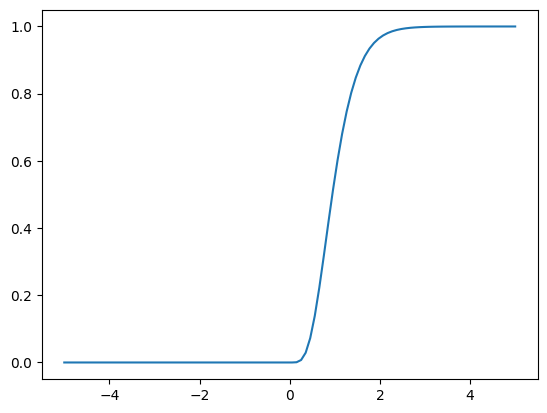

In [15]:
xs = np.linspace(-5, 5, 100)
ys = stats.ncf.cdf(xs, 12-1, (11*12)-1, 0)  # f 누적 분포

_, axe = plt.subplots()
axe.plot(xs, ys)

1 - stats.ncf.cdf([1.453139015449641], 12-1, (11*12)-12,0)

array([5.19483058e-06])

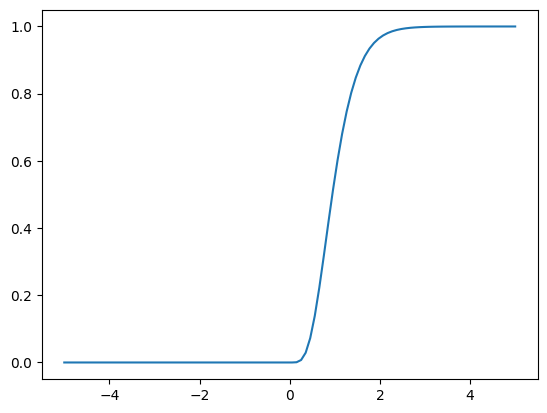

In [16]:
xs = np.linspace(-5, 5, 100)
ys = stats.ncf.cdf(xs, 12-1, (11*12)-1, 0)  # f 누적 분포

_, axe = plt.subplots()
axe.plot(xs, ys)

1 - stats.ncf.cdf([4.7365553626435775], 12-1, (11*12)-12,0)